# CatBoost

In [184]:
# Import the libraries you'll need
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [185]:
from datetime import datetime
import os

# 現在時刻を取得して、フォーマット
now = datetime.now()
timestamp = now.strftime('%Y%m%d_%H%M%S')

os.makedirs(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}", exist_ok=False)
os.makedirs(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/データ", exist_ok=False)

<>:8: SyntaxWarning: invalid escape sequence '\W'
<>:9: SyntaxWarning: invalid escape sequence '\W'
<>:8: SyntaxWarning: invalid escape sequence '\W'
<>:9: SyntaxWarning: invalid escape sequence '\W'
C:\Users\thisi\AppData\Local\Temp\ipykernel_18636\2640147884.py:8: SyntaxWarning: invalid escape sequence '\W'
  os.makedirs(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}", exist_ok=False)
C:\Users\thisi\AppData\Local\Temp\ipykernel_18636\2640147884.py:9: SyntaxWarning: invalid escape sequence '\W'
  os.makedirs(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/データ", exist_ok=False)


In [186]:
# df = pd.read_excel("E:/Je respire/解析/1. 脳血流と問題カテゴリの関連.xlsx", sheet_name="ディアビアイ")
# df = pd.read_excel("/root/workspace/1.2 脳血流と問題カテゴリの関連 - 背外側追加.xlsx", sheet_name="ディアビアイ")
df = pd.read_excel("../1.2 脳血流と問題カテゴリの関連 - 背外側追加.xlsx", sheet_name="ディアビアイ")



In [187]:
df = df.drop(columns=['subject', 'question', #前半部分
                   'dataset_no', 'sheet_name']) # 後半部分

# df = df.iloc[24:246, :]  

In [188]:
df["pupil_std"] = df[["left_pupil_std", "right_pupil_std"]].mean(axis=1, skipna=False)

In [189]:
# 脳血流のオキシヘモグロビンだけ使う場合
df = df.drop(columns=['CH1.1_std', 'CH2.1_std', 'CH3.1_std',
       'CH4.1_std', 'CH5.1_std', 'CH6.1_std', 'CH7.1_std', 'CH8.1_std',
       'CH9.1_std', 'CH10.1_std', 'CH11.1_std', 'CH12.1_std', 'CH13.1_std',
       'CH14.1_std', 'CH15.1_std', 'CH16.1_std', 'CH17.1_std', 'CH18.1_std',
       'CH19.1_std', 'CH20.1_std', 'CH21.1_std', 'CH22.1_std', 'CH1.2_std',
       'CH2.2_std', 'CH3.2_std', 'CH4.2_std', 'CH5.2_std', 'CH6.2_std',
       'CH7.2_std', 'CH8.2_std', 'CH9.2_std', 'CH10.2_std', 'CH11.2_std',
       'CH12.2_std', 'CH13.2_std', 'CH14.2_std', 'CH15.2_std', 'CH16.2_std',
       'CH17.2_std', 'CH18.2_std', 'CH19.2_std', 'CH20.2_std', 'CH21.2_std',
       'CH22.2_std' ]) # 後半部分

df = df.drop(columns=['right_pupil_std','left_pupil_std', 'CH1_std', 'CH2_std',
       'CH3_std', 'CH4_std', 'CH5_std', 'CH6_std', 'CH7_std', 'CH8_std',
       'CH9_std', 'CH10_std', 'CH11_std', 'CH12_std',
       'CH13_std', 'CH14_std', 'CH15_std', 'CH16_std', 'CH17_std',
       'CH18_std', 'CH19_std', 'CH20_std', 'CH21_std',
       'CH22_std']) # 主要な特徴量のみを残す場合


In [190]:
df['score'] = df['score'].replace(2, 1)

In [191]:
df.columns

Index(['q_category', 'score', 'right_haigai', 'hainai', 'left_haigai',
       'Sensor-E:SC/GSR_std', 'Sensor-G:BVP_std', '[G] BVP Amp._std',
       '[G] Heart Rate_std', '[G] HRV Amp._std',
       '[G] HRV-LF Power (0,04-0,16 Hz)_std',
       '[G] HRV-HF Power (0,16-0,4 Hz)_std', '[G] HRV-LF / HRV-HF _std',
       'pupil_std'],
      dtype='object')

In [192]:
df_reading = df[df['q_category']==1]
df_memory = df[df['q_category']==2]
df_recognition = df[df['q_category']==3]
df_attention = df[df['q_category']==4]

In [193]:
df_reading = df_reading.drop(columns=['q_category'])
df_memory = df_memory.drop(columns=['q_category'])
df_recognition = df_recognition.drop(columns=['q_category'])
df_attention = df_attention.drop(columns=['q_category'])

In [194]:
# 使用するdfを指定
df = df_attention

<>:15: SyntaxWarning: invalid escape sequence '\W'
<>:15: SyntaxWarning: invalid escape sequence '\W'
C:\Users\thisi\AppData\Local\Temp\ipykernel_18636\3721489985.py:15: SyntaxWarning: invalid escape sequence '\W'
  f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/Correlation Matrix.png",


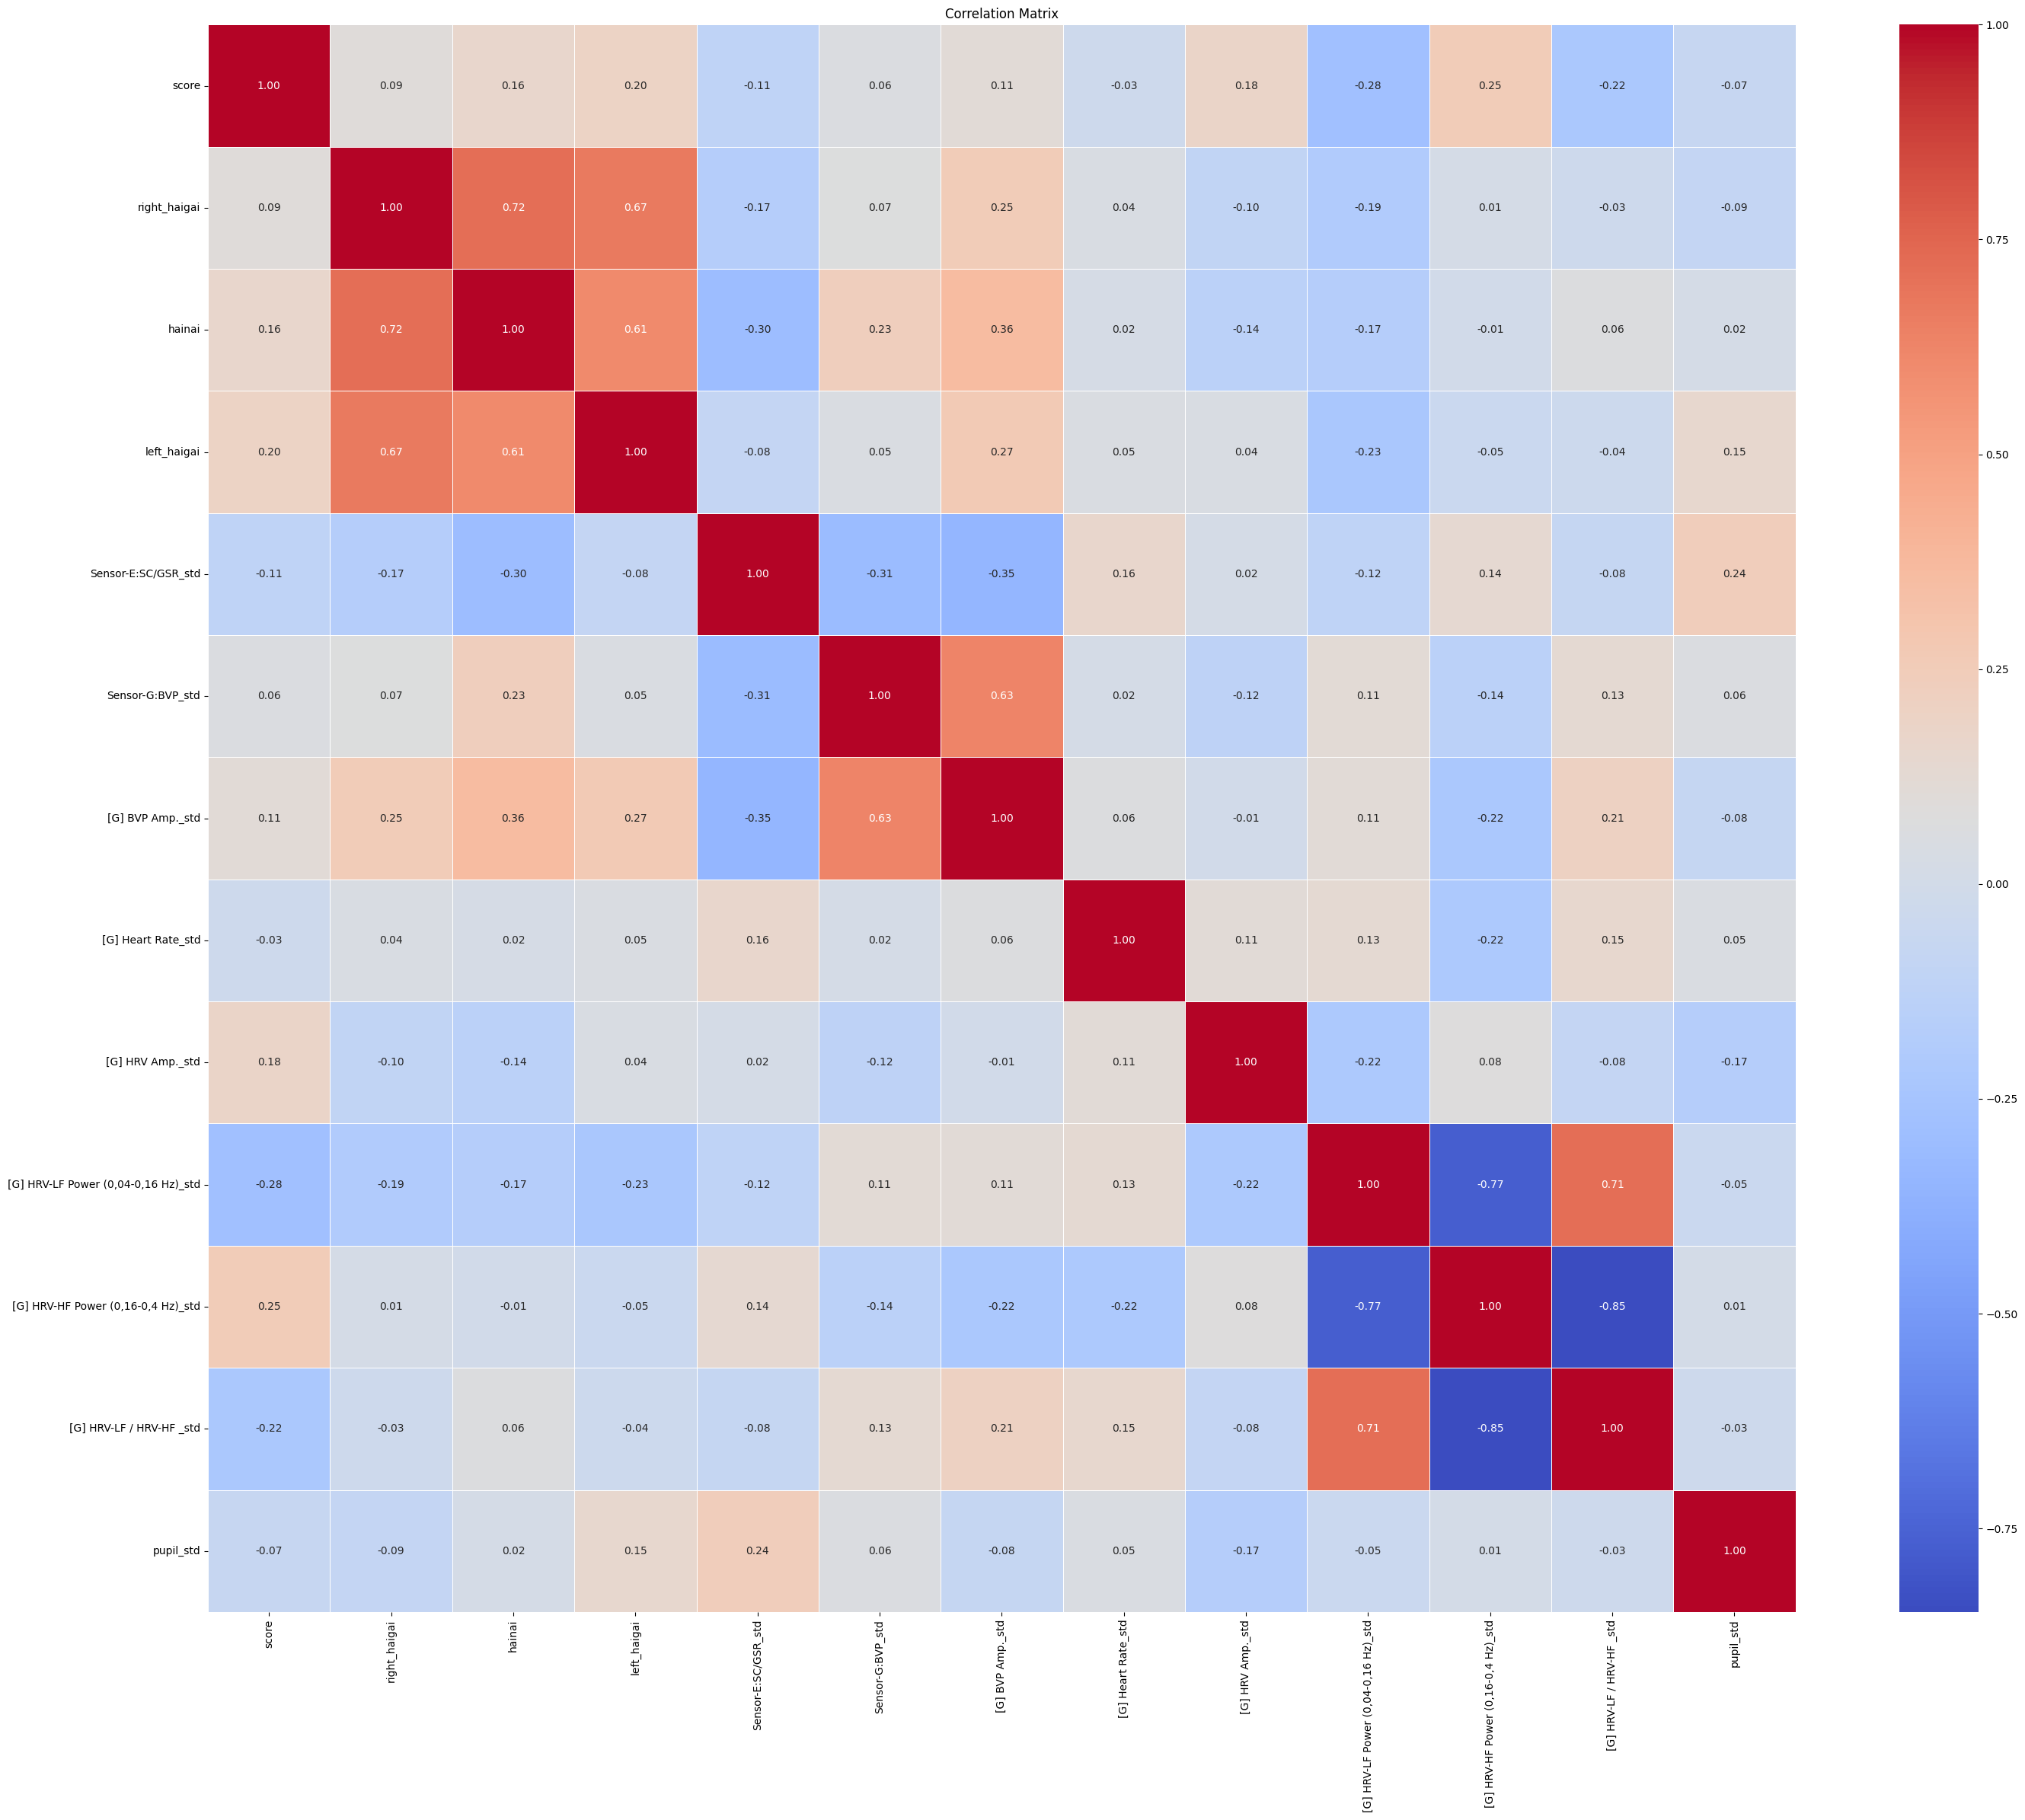

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 相関行列の計算
corr_matrix = df.corr(method='pearson')

# ヒートマップの描画
plt.figure(figsize=(30, 24))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()

plt.savefig(
    f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/Correlation Matrix.png",
    dpi=1000,              # 解像度（論文・レポートは300以上推奨）
    bbox_inches='tight',  # 余白を自動調整してカット
    transparent=True      # 背景を透明化
)

plt.show()

In [196]:
df.columns = [col.replace(':', '_')
                .replace('/', '_')
                .replace('[', '')
                .replace(']', '')
                .replace(' ', '_')
                .replace('.', '_')
                .replace(',', '_')
                .replace('(', '_')
                .replace(')', '_')
                for col in df.columns]

In [197]:
X = df.drop(columns=['score'])
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = CatBoostClassifier(random_state=42, verbose=0)
model.fit(X_train, y_train)



In [198]:
# param_dist = {
#     'n_estimators': optuna.distributions.FloatDistribution(50, 500),
#     'max_depth': optuna.distributions.FloatDistribution(2, 50),
#     'min_samples_split': optuna.distributions.FloatDistribution(2, 5),
#     'min_samples_leaf': optuna.distributions.FloatDistribution(2, 10),
#     'max_features': ['sqrt', 'log2']
# }

# Define hyperparameter search space
param_dist = {
    "iterations": optuna.distributions.IntDistribution(200, 1000),
    "depth": optuna.distributions.IntDistribution(3, 10),
    "learning_rate": optuna.distributions.FloatDistribution(1e-3, 0.3, log=True),
    "l2_leaf_reg": optuna.distributions.FloatDistribution(1, 10),
    "bagging_temperature": optuna.distributions.FloatDistribution(0, 1),
    "border_count": optuna.distributions.IntDistribution(32, 255),
}

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

optuna_search = OptunaSearchCV(
    model,
    param_dist,
    cv=cv, # 交差検証の設定
    n_trials=500, # トライアル回数
    scoring='accuracy', # 評価指標
    n_jobs=-1, # 計算するコアの数
    verbose=-1
)

C:\Users\thisi\AppData\Local\Temp\ipykernel_18636\3035061261.py:21: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(


In [199]:
optuna_search.fit(X_train, y_train) # モデルの学習
y_pred = optuna_search.predict(X_test) # テストデータに対する予測

[I 2025-10-31 16:11:24,438] A new study created in memory with name: no-name-aa0f565e-f6ce-43aa-a852-6a16122b4e69
[I 2025-10-31 16:11:28,684] Trial 12 finished with value: 0.375 and parameters: {'iterations': 210, 'depth': 6, 'learning_rate': 0.03282903793813042, 'l2_leaf_reg': 9.670980531747578, 'bagging_temperature': 0.38238817869892616, 'border_count': 56}. Best is trial 12 with value: 0.375.
[I 2025-10-31 16:11:28,759] Trial 6 finished with value: 0.41666666666666663 and parameters: {'iterations': 228, 'depth': 6, 'learning_rate': 0.010576014593327725, 'l2_leaf_reg': 7.773833879429186, 'bagging_temperature': 0.9425966272760795, 'border_count': 57}. Best is trial 6 with value: 0.41666666666666663.
[I 2025-10-31 16:11:29,856] Trial 0 finished with value: 0.375 and parameters: {'iterations': 333, 'depth': 6, 'learning_rate': 0.005650959168041112, 'l2_leaf_reg': 9.402007350073644, 'bagging_temperature': 0.6057445783963384, 'border_count': 37}. Best is trial 6 with value: 0.416666666666

In [200]:
from joblib import dump
# モデルの保存
dump(optuna_search.best_estimator_, f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/optuna_model.joblib")

<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
C:\Users\thisi\AppData\Local\Temp\ipykernel_18636\3737775850.py:3: SyntaxWarning: invalid escape sequence '\W'
  dump(optuna_search.best_estimator_, f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/optuna_model.joblib")


['C:\\WorkSpace\\Jerespire\\結果保存/20251031_161110/optuna_model.joblib']

In [201]:
print("Best parameters: ", optuna_search.best_params_) # 最良のパラメータの表示
print("Test set accuracy: ", accuracy_score(y_test, y_pred)) # テストデータに対する予測精度の表示
print("Train set accuracy: ", accuracy_score(y_train, optuna_search.predict(X_train))) # 学習データに対する予測精度の表示
print("Test F1 Score: ", f1_score(y_test, y_pred))
print("Train F1 Score: ", f1_score(y_train, optuna_search.predict(X_train)))
print(classification_report(y_test, y_pred, target_names=['Incorrect','Correct'], digits=3, output_dict=True)) # テストデータの分類結果報告

# 結果の保存用の辞書を作成
metrics = {
    "Best Parameters": optuna_search.best_params_,
    "Test Set Accuracy": accuracy_score(y_test, y_pred),
    "Train Set Accuracy": accuracy_score(y_train, optuna_search.predict(X_train)),
    "Test F1 Score": f1_score(y_test, y_pred),
    "Train F1 Score": f1_score(y_train, optuna_search.predict(X_train)),
    "Classification Report": classification_report(y_test, y_pred, target_names=['Incorrect','Correct'], digits=3, output_dict=True)
}

# 保存
pd.DataFrame([metrics]).to_csv(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/metrics.csv", index=False)

# 予測値も保存
pd.DataFrame({"y_true": y_test, "y_pred": y_pred}).to_csv(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/predictions.csv", index=False)

Best parameters:  {'iterations': 618, 'depth': 10, 'learning_rate': 0.0931122782473536, 'l2_leaf_reg': 6.9265356130737, 'bagging_temperature': 0.05403676455823679, 'border_count': 248}
Test set accuracy:  0.3333333333333333
Train set accuracy:  1.0
Test F1 Score:  0.5
Train F1 Score:  1.0
{'Incorrect': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5.0}, 'Correct': {'precision': 0.4444444444444444, 'recall': 0.5714285714285714, 'f1-score': 0.5, 'support': 7.0}, 'accuracy': 0.3333333333333333, 'macro avg': {'precision': 0.2222222222222222, 'recall': 0.2857142857142857, 'f1-score': 0.25, 'support': 12.0}, 'weighted avg': {'precision': 0.25925925925925924, 'recall': 0.3333333333333333, 'f1-score': 0.2916666666666667, 'support': 12.0}}


<>:19: SyntaxWarning: invalid escape sequence '\W'
<>:22: SyntaxWarning: invalid escape sequence '\W'
<>:19: SyntaxWarning: invalid escape sequence '\W'
<>:22: SyntaxWarning: invalid escape sequence '\W'
C:\Users\thisi\AppData\Local\Temp\ipykernel_18636\2258375215.py:19: SyntaxWarning: invalid escape sequence '\W'
  pd.DataFrame([metrics]).to_csv(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/metrics.csv", index=False)
C:\Users\thisi\AppData\Local\Temp\ipykernel_18636\2258375215.py:22: SyntaxWarning: invalid escape sequence '\W'
  pd.DataFrame({"y_true": y_test, "y_pred": y_pred}).to_csv(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/predictions.csv", index=False)


<>:9: SyntaxWarning: invalid escape sequence '\W'
<>:9: SyntaxWarning: invalid escape sequence '\W'
C:\Users\thisi\AppData\Local\Temp\ipykernel_18636\3435743887.py:9: SyntaxWarning: invalid escape sequence '\W'
  f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/Confusion Matrix.png",


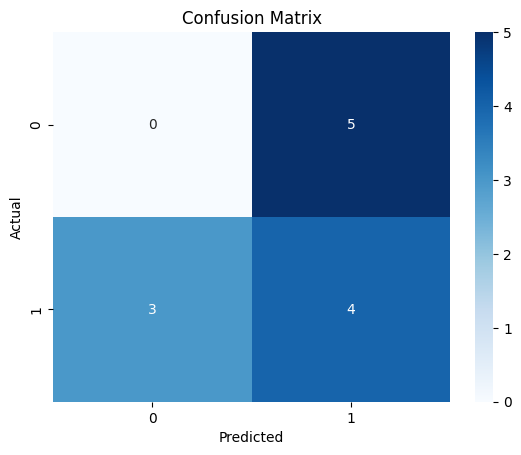

In [202]:
 # 混同行列の表示
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.savefig(
    f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/Confusion Matrix.png",
    dpi=1000,              # 解像度（論文・レポートは300以上推奨）
    bbox_inches='tight',  # 余白を自動調整してカット
    transparent=True      # 背景を透明化
)

plt.show()

In [203]:
explainer = shap.TreeExplainer(model=optuna_search.best_estimator_)
shap_values = explainer.shap_values(X)
explanation = explainer(X)

# SHAPの結果を保存
np.save(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/shap_values.npy", shap_values)
np.save(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/shap_explanation.npy", explanation)
X.to_pickle(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/データ/X.pkl")
X_train.to_pickle(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/データ/X_train.pkl")
X_test.to_pickle(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/データ/X_test.pkl")
y.to_pickle(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/データ/y.pkl")
y_train.to_pickle(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/データ/y_train.pkl")
y_test.to_pickle(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/データ/y_test.pkl")
np.save(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/データ/X.npy", X)
np.save(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/データ/X_train.npy", X_train)
np.save(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/データ/X_test.npy", X_test)
np.save(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/データ/y.npy", X)
np.save(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/データ/y.npy", X)
np.save(f"C:\WorkSpace\Jerespire\結果保存/{timestamp}/データ/y.npy", X)

<>:6: SyntaxWarning: invalid escape sequence '\W'
<>:7: SyntaxWarning: invalid escape sequence '\W'
<>:8: SyntaxWarning: invalid escape sequence '\W'
<>:9: SyntaxWarning: invalid escape sequence '\W'
<>:10: SyntaxWarning: invalid escape sequence '\W'
<>:11: SyntaxWarning: invalid escape sequence '\W'
<>:12: SyntaxWarning: invalid escape sequence '\W'
<>:13: SyntaxWarning: invalid escape sequence '\W'
<>:14: SyntaxWarning: invalid escape sequence '\W'
<>:15: SyntaxWarning: invalid escape sequence '\W'
<>:16: SyntaxWarning: invalid escape sequence '\W'
<>:17: SyntaxWarning: invalid escape sequence '\W'
<>:18: SyntaxWarning: invalid escape sequence '\W'
<>:19: SyntaxWarning: invalid escape sequence '\W'
<>:6: SyntaxWarning: invalid escape sequence '\W'
<>:7: SyntaxWarning: invalid escape sequence '\W'
<>:8: SyntaxWarning: invalid escape sequence '\W'
<>:9: SyntaxWarning: invalid escape sequence '\W'
<>:10: SyntaxWarning: invalid escape sequence '\W'
<>:11: SyntaxWarning: invalid escape se

In [204]:
print(explainer)
print(shap_values)
print(explanation)

[[ 1.45113296e-01  1.33009222e-01  2.59543742e-01  4.53275841e-01
   4.36733879e-01  4.13801443e-01  2.27840445e-01  1.16267514e-01
   1.77163058e-01  1.42812232e-01  2.05500984e-01  5.74763554e-01]
 [ 3.31025753e-01  3.05410435e-01  4.82013257e-02  3.08118358e-01
   3.15558319e-01  3.89865217e-01  1.38097228e-01  5.58095611e-02
   1.72590063e-01  1.27437004e-01  1.95901324e-01  8.91200692e-01]
 [-2.97416494e-01 -6.67092578e-01 -8.89658104e-01 -2.36413520e-01
  -3.43799568e-01 -2.55597227e-01 -2.94713325e-02 -3.97826216e-01
  -2.05021281e-01 -1.04312507e-01 -2.41987278e-01 -1.85062556e+00]
 [-3.67101526e-01 -2.29325128e+00 -9.95112947e-01 -3.52642083e-01
  -3.99288920e-01 -3.40962263e-01 -4.80435241e-02 -3.18016674e-01
  -1.74211566e-01 -1.01626963e-01 -2.06130498e-01  1.41886056e-01]
 [ 3.23701471e-01  7.88479156e-01 -3.76070664e-01  1.72795125e-01
   3.94688179e-01  3.26359153e-01  1.64787367e-01 -8.25820847e-02
   1.18925476e-01  1.10356456e-01  1.05309752e-01  1.19026289e+00]
 [ 2.

In [205]:
shap_values.shape

(60, 12)

In [206]:
shap_values


array([[ 1.45113296e-01,  1.33009222e-01,  2.59543742e-01,
         4.53275841e-01,  4.36733879e-01,  4.13801443e-01,
         2.27840445e-01,  1.16267514e-01,  1.77163058e-01,
         1.42812232e-01,  2.05500984e-01,  5.74763554e-01],
       [ 3.31025753e-01,  3.05410435e-01,  4.82013257e-02,
         3.08118358e-01,  3.15558319e-01,  3.89865217e-01,
         1.38097228e-01,  5.58095611e-02,  1.72590063e-01,
         1.27437004e-01,  1.95901324e-01,  8.91200692e-01],
       [-2.97416494e-01, -6.67092578e-01, -8.89658104e-01,
        -2.36413520e-01, -3.43799568e-01, -2.55597227e-01,
        -2.94713325e-02, -3.97826216e-01, -2.05021281e-01,
        -1.04312507e-01, -2.41987278e-01, -1.85062556e+00],
       [-3.67101526e-01, -2.29325128e+00, -9.95112947e-01,
        -3.52642083e-01, -3.99288920e-01, -3.40962263e-01,
        -4.80435241e-02, -3.18016674e-01, -1.74211566e-01,
        -1.01626963e-01, -2.06130498e-01,  1.41886056e-01],
       [ 3.23701471e-01,  7.88479156e-01, -3.7607066

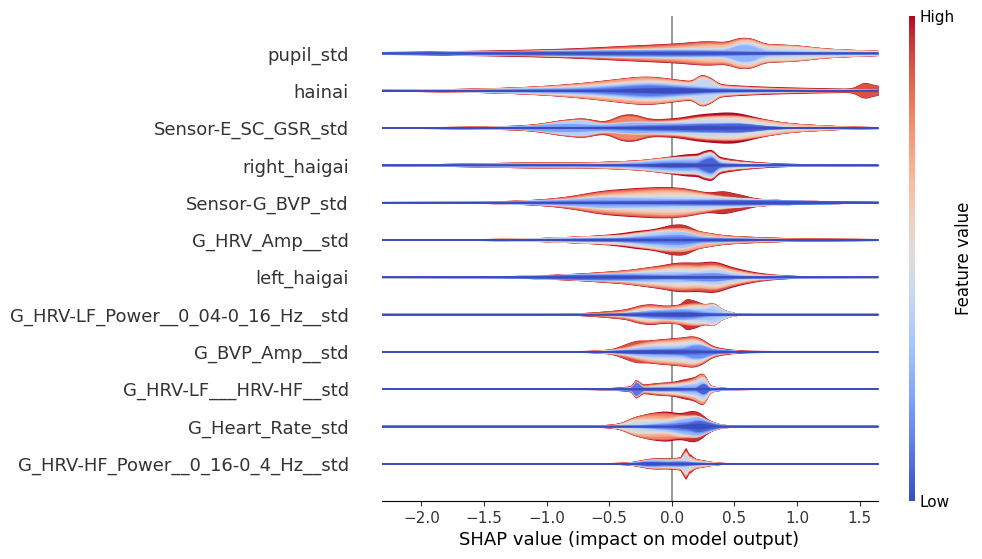

In [207]:
feat_names = list(X.columns)
shap.plots.violin(shap_values, features=X, feature_names=feat_names, plot_type="layered_violin")

In [208]:
print(X.columns)

Index(['right_haigai', 'hainai', 'left_haigai', 'Sensor-E_SC_GSR_std',
       'Sensor-G_BVP_std', 'G_BVP_Amp__std', 'G_Heart_Rate_std',
       'G_HRV_Amp__std', 'G_HRV-LF_Power__0_04-0_16_Hz__std',
       'G_HRV-HF_Power__0_16-0_4_Hz__std', 'G_HRV-LF___HRV-HF__std',
       'pupil_std'],
      dtype='object')


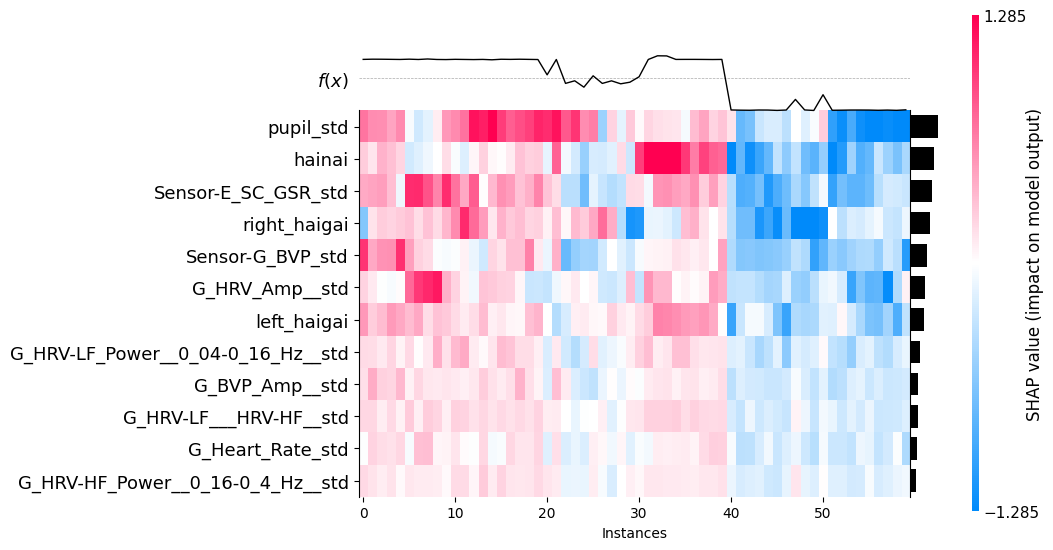

<Axes: xlabel='Instances'>

In [209]:
shap.plots.heatmap(explanation, max_display=12)

Index(['right_haigai', 'hainai', 'left_haigai', 'Sensor-E_SC_GSR_std',
       'Sensor-G_BVP_std', 'G_BVP_Amp__std', 'G_Heart_Rate_std',
       'G_HRV_Amp__std', 'G_HRV-LF_Power__0_04-0_16_Hz__std',
       'G_HRV-HF_Power__0_16-0_4_Hz__std', 'G_HRV-LF___HRV-HF__std',
       'pupil_std'],
      dtype='object')


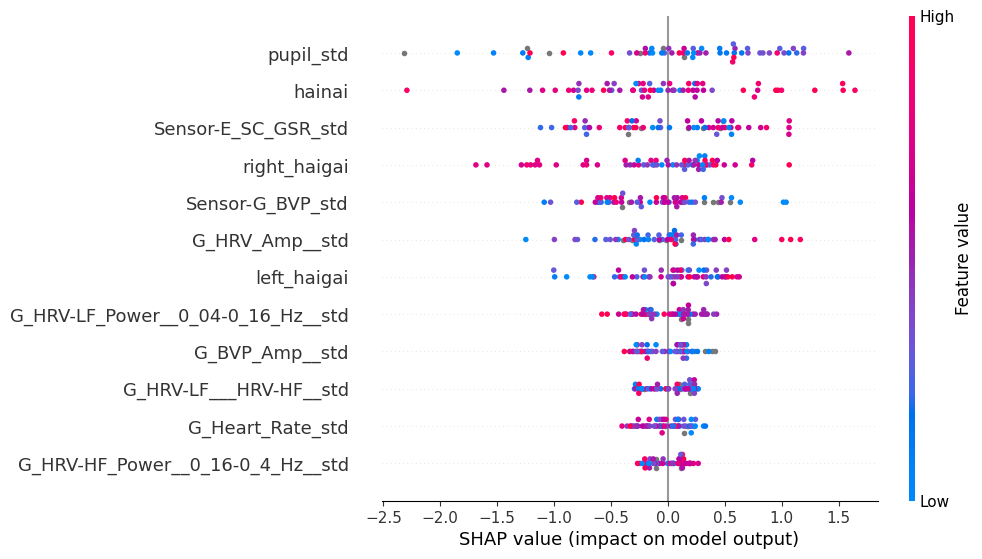

In [210]:
print(X.columns)
shap.plots.beeswarm(explanation, max_display=20)

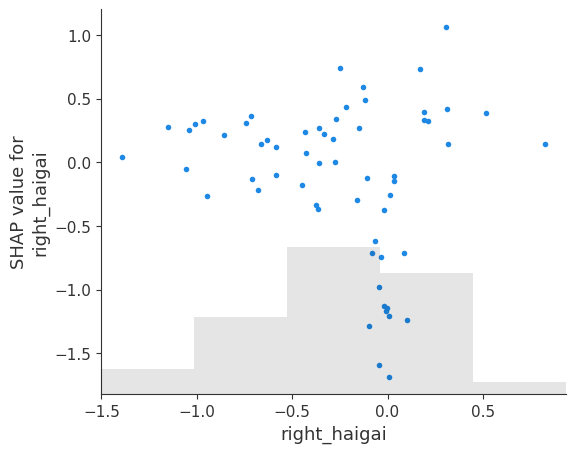

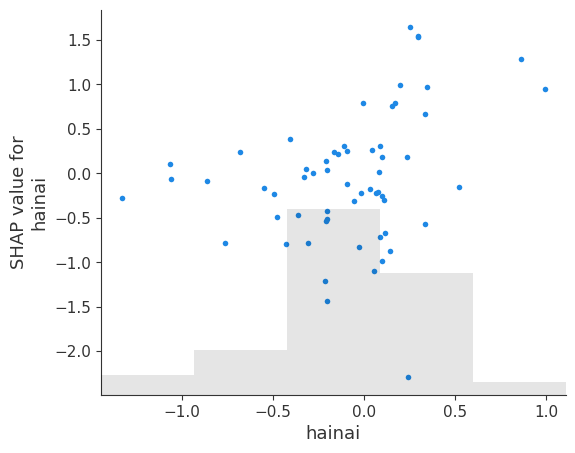

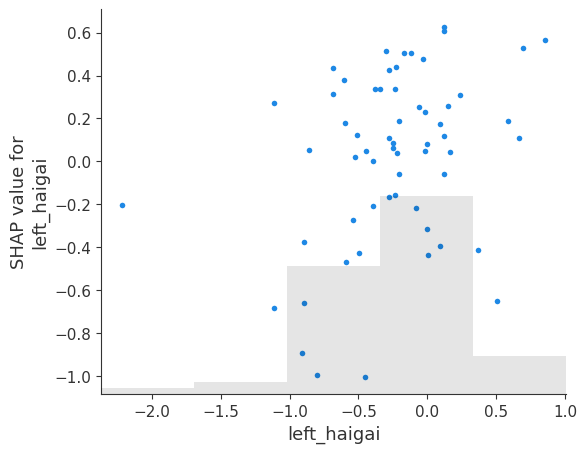

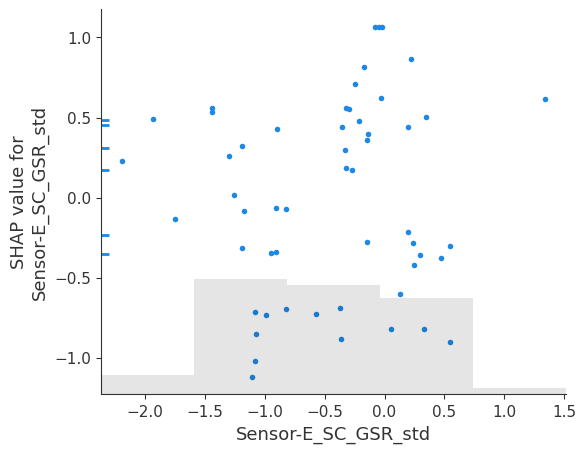

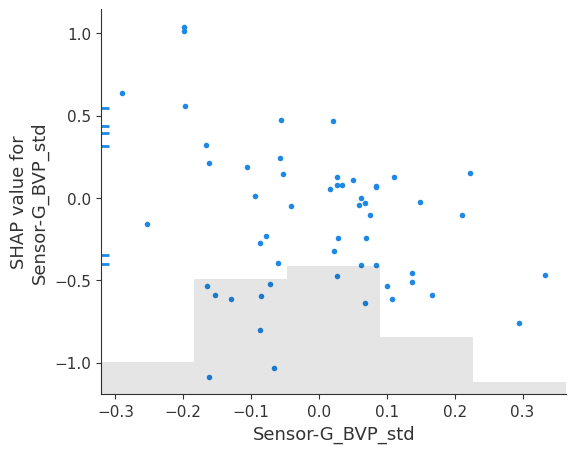

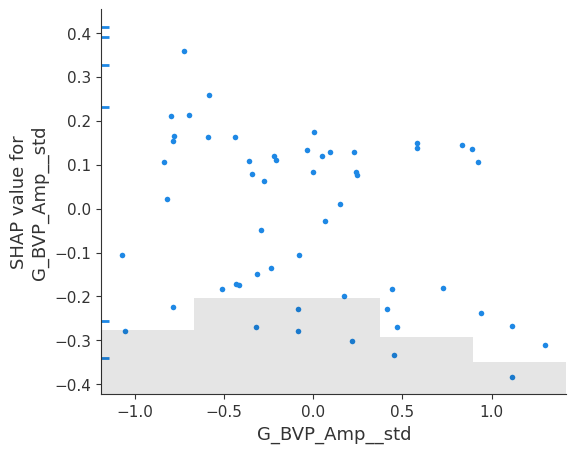

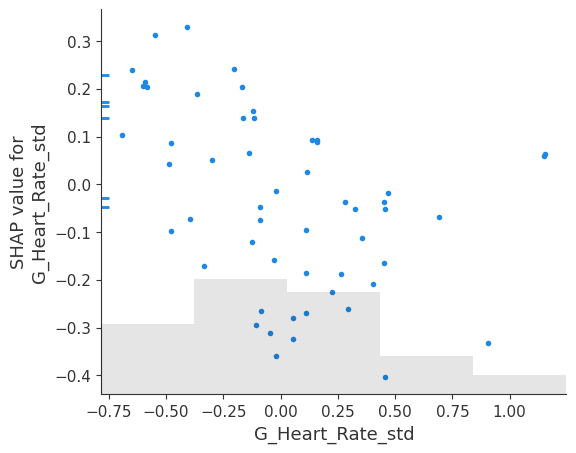

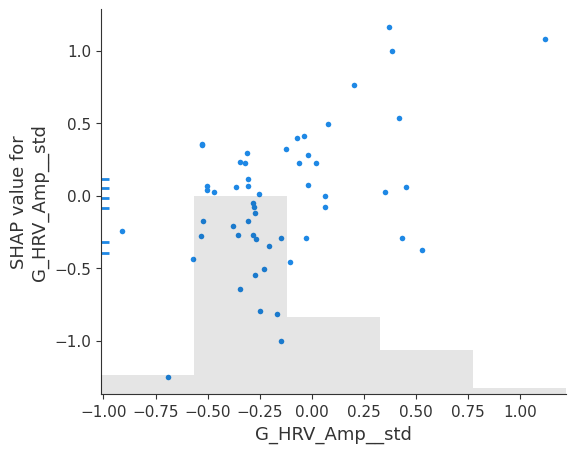

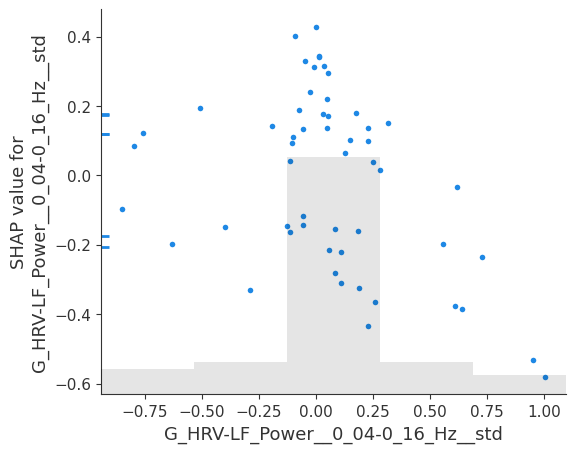

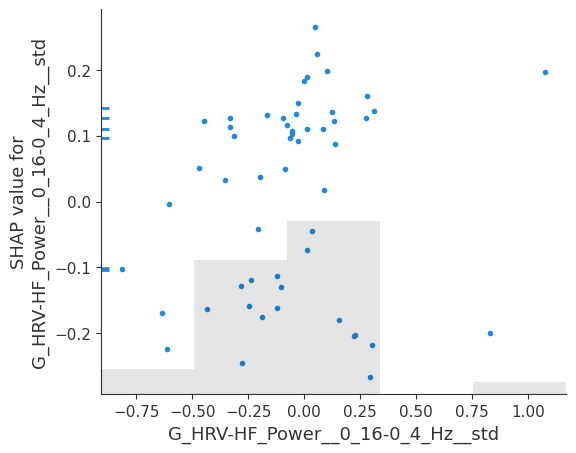

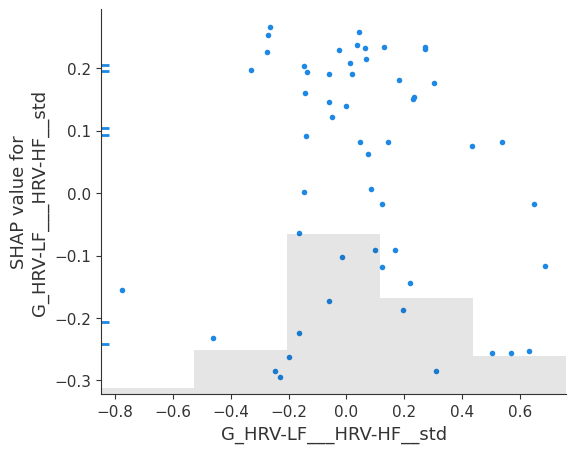

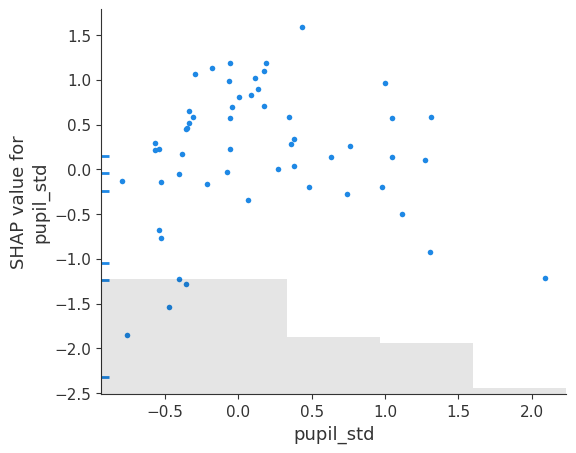

In [211]:
# shap.plots.scatter(explanation[:, "left_pupil_std"], color=explanation[:, "right_pupil_std"])
for i in range(len(X.columns)):
    shap.plots.scatter(explanation[:,i])   

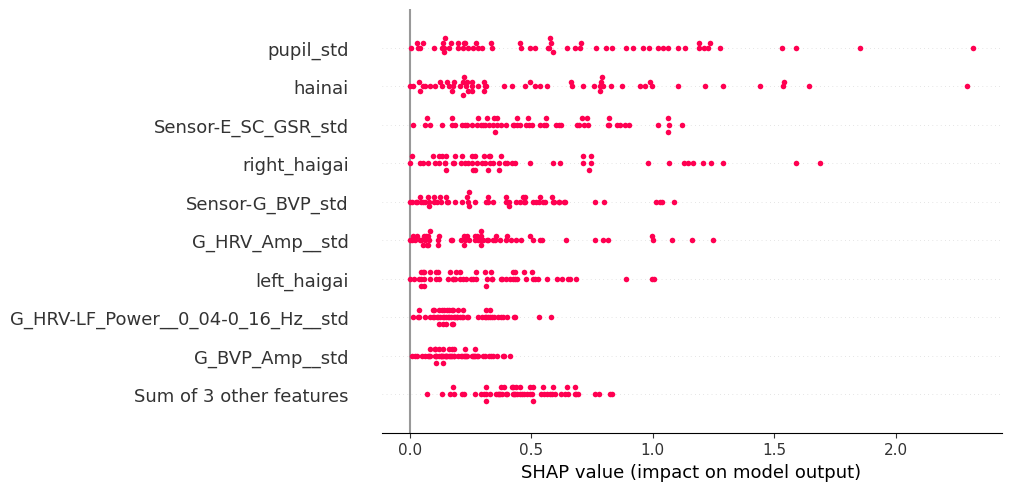

In [212]:
shap.plots.beeswarm(explanation.abs, color="shap_red")

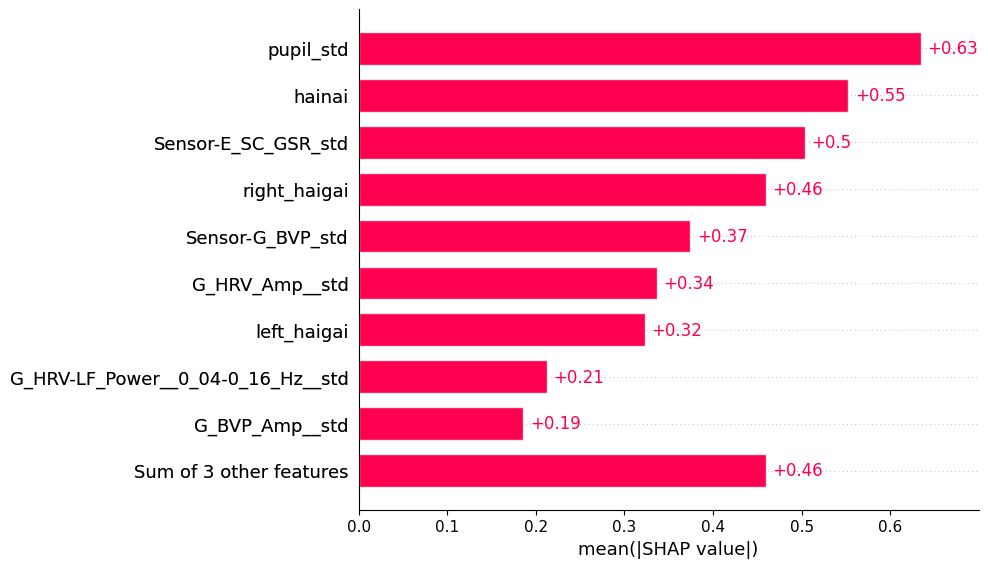

In [213]:
shap.plots.bar(explanation.abs.mean(0))

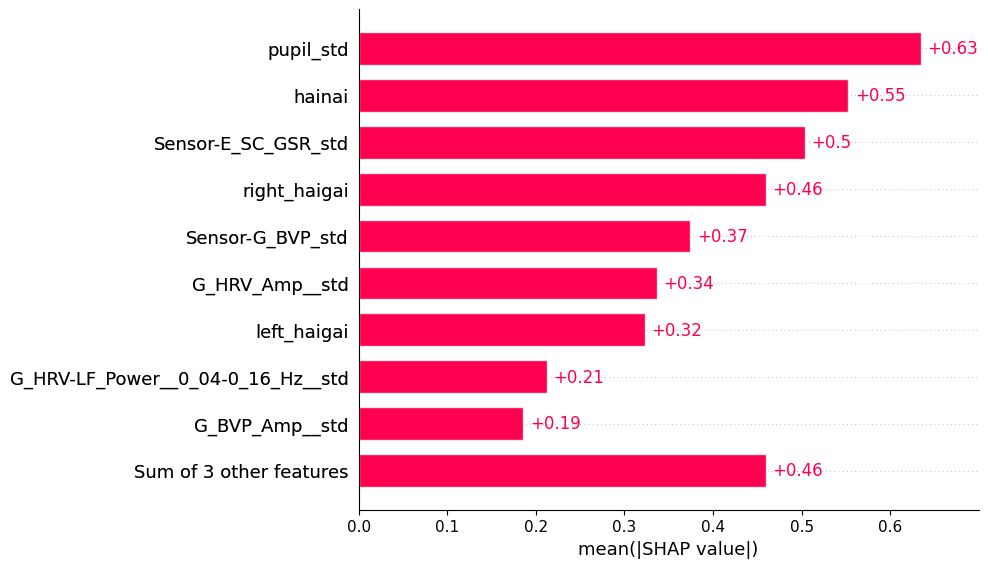

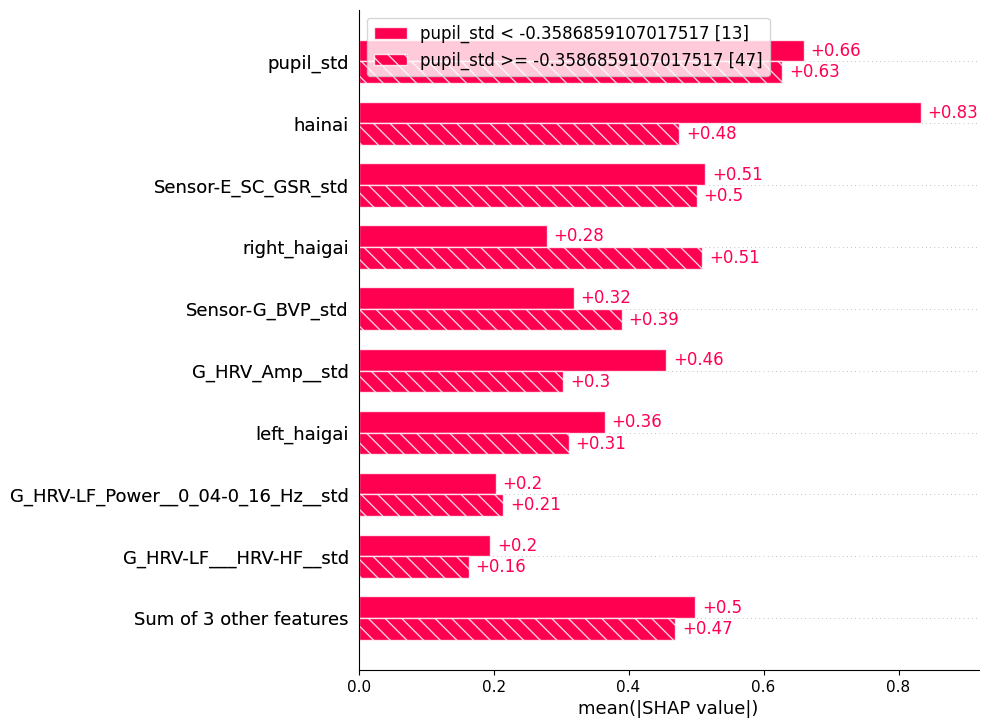

In [214]:
shap.plots.bar(explanation)
shap.plots.bar(explanation.cohorts(2).abs.mean(0))

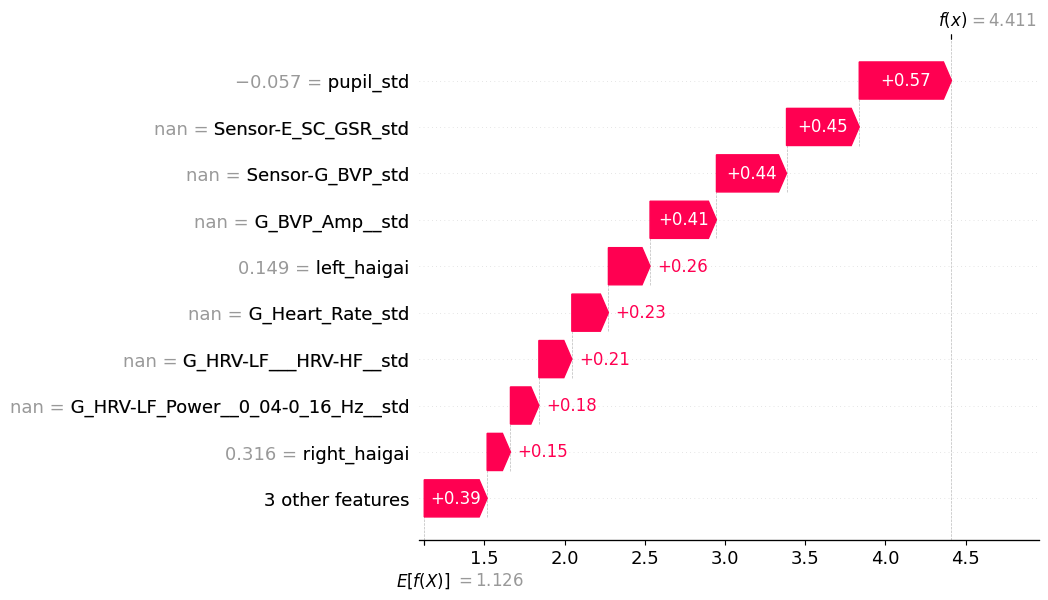

In [215]:
shap.plots.waterfall(explanation[0])